In [21]:
from numpy import *
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

In [22]:
#读取数据
x_train, y_train = load_svmlight_file("a9a.txt",n_features=123)
x_test, y_test = load_svmlight_file("a9a.t", n_features=123)

y_train =  y_train.reshape(y_train.shape[0],1)
y_test =  y_test.reshape(y_test.shape[0],1)

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

#参数初始化
m, n = np.shape(x_train)
theta = np.ones((n, 1))
alpha = 0.005
maxIteration = 1000

In [23]:
def cal_loss(x,y,theta):
    return  -( y*log(sigmoid(x * theta)) + (1-y)*log(1-sigmoid(x * theta)) ).sum()/ x.shape[0]

def sigmoid(a):
    return 1/(1+exp(-a))

def cal_accur(x,y,theta):
    hypothesis =sigmoid( x * theta)
    hypothesis[hypothesis > 0.5] = 1
    hypothesis[hypothesis <= 0.5] = 0
    return np.count_nonzero(hypothesis==y)/ x.shape[0]

def cal_gradient_sgd(w):
    random_num = random.randint(0,m)
    return (x_train[random_num].T * (sigmoid(x_train[random_num] * w) - y_train[random_num]))

train_loss, test_loss,train_accr,test_accr = [],[],[],[]

In [24]:
train_loss_n,test_loss_n,train_accr,test_accr = [],[],[],[]
theta = np.ones((n, 1))

def NAG(theta):
    gama = 0.9
    vt = 0
    for i in range(0, maxIteration):
        gradient = cal_gradient_sgd(theta - gama*vt)
        vt = gama*vt + alpha * gradient
        theta = theta - vt

        train_loss_n.append(cal_loss(x_train,y_train,theta))
        test_loss_n.append(cal_loss(x_test,y_test,theta))
        train_accr.append(cal_accur(x_train,y_train,theta))
        test_accr.append(cal_accur(x_test,y_test,theta))
        
NAG(theta)

In [25]:
train_loss_r,test_loss_r,train_accr,test_accr = [],[],[],[]
theta = np.ones((n, 1))

def RMSProp(theta):
    gama = 0.9
    vt = 0
    Egt = 0
    e=0.00000001  
    learning_rate = 0.3
    for i in range(0, maxIteration):
        gradient = cal_gradient_sgd(theta - gama*vt)
        Egt = gama * Egt + ((1-gama)*(gradient**2)).sum()  
        theta = theta - learning_rate*gradient/math.sqrt(Egt + e)  

        train_loss_r.append(cal_loss(x_train,y_train,theta))
        test_loss_r.append(cal_loss(x_test,y_test,theta))
        train_accr.append(cal_accur(x_train,y_train,theta))
        test_accr.append(cal_accur(x_test,y_test,theta))
        
RMSProp(theta)

In [26]:
train_loss_aDe,test_loss_aDe,train_accr,test_accr= [],[],[],[]
theta = np.ones((n, 1))

def adaDelta(theta):

    rho = 0.9
    Egt=0  
    Edt = 0  
    e=0.00000001  
    delta = 0  
    learning_rate = 2000
   
    for i in range(0, maxIteration):
        
        gradient = cal_gradient_sgd(theta)
        Egt = rho * Egt + ((1-rho)*(gradient**2) ).sum()  
        delta = - math.sqrt(Edt + e)*gradient/math.sqrt(Egt + e)
        Edt =rho*Edt+( (1-rho)*(delta**2) ).sum()  
        theta = theta + learning_rate*delta 
        
        train_loss_aDe.append(cal_loss(x_train,y_train,theta))
        test_loss_aDe.append(cal_loss(x_test,y_test,theta))
        train_accr.append(cal_accur(x_train,y_train,theta))
        test_accr.append(cal_accur(x_test,y_test,theta))
        
adaDelta(theta)


In [27]:
train_loss_ad,test_loss_ad,train_accr,test_accr = [],[],[],[]
theta = np.ones((n, 1))

def adam(theta):
 
    t = 0 
    m = 0  
    v = 0  
    b1 = 0.9  
    b2 = 0.995  
    learning_rate = 0.05
    for i in range(0, maxIteration):
        
        gradient = cal_gradient_sgd(theta)
        t +=1 
        m = b1*m + ((1-b1)*gradient).sum() 
        v = b2*v + ((1-b2)*(gradient**2)).sum()  
        mt = m/(1-(b1**t))  
        vt = v/(1-(b2**t)) 
        theta = theta- learning_rate * mt/(math.sqrt(vt)+e) 
        
        train_loss_ad.append(cal_loss(x_train,y_train,theta))
        test_loss_ad.append(cal_loss(x_test,y_test,theta))
        train_accr.append(cal_accur(x_train,y_train,theta))
        test_accr.append(cal_accur(x_test,y_test,theta))
        
adam(theta)


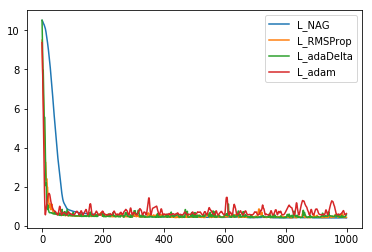

In [31]:
%matplotlib inline
plt.plot(train_loss_n, label="L_NAG")
plt.plot(train_loss_r, label ="L_RMSProp")
plt.plot(train_loss_aDe, label="L_adaDelta")
plt.plot(train_loss_ad, label="L_adam")
plt.legend(loc="upper right")

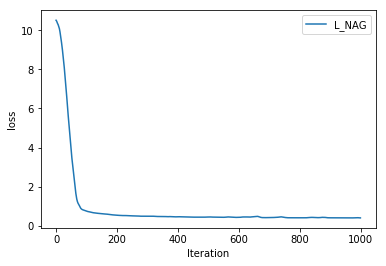

In [33]:
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss_n, label="L_NAG")
plt.legend(loc ='upper right')

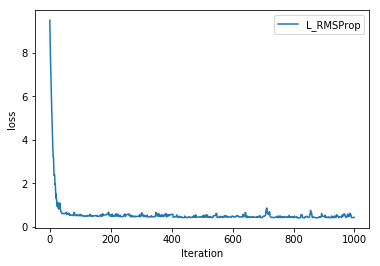

In [35]:
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss_r,label="L_RMSProp")
plt.legend(loc ='upper right')

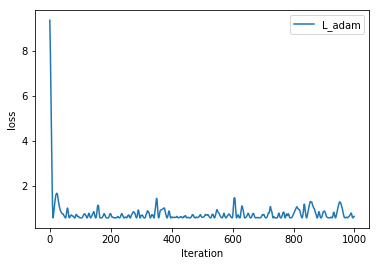

In [37]:
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss_ad, label="L_adam")
plt.legend(loc ='upper right')

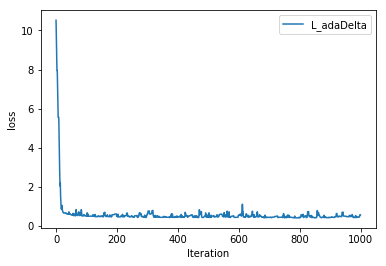

In [38]:
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.plot(train_loss_aDe, label="L_adaDelta")
plt.legend(loc ='upper right')